乳がんデータをロジスティック回帰モデルで機械学習させる。

In [13]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = 1 - data.target
X = X[:, :10]

from sklearn.linear_model import LogisticRegression

model_lor = LogisticRegression()
model_lor.fit(X, y)
y_pred = model_lor.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


混同行列で結果を表形式にまとめる。

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[341  16]
 [ 36 176]]


In [16]:
#正解率
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9086115992970123

In [17]:
#適合率
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.9166666666666666

In [18]:
#再現率
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8301886792452831

In [19]:
#F値
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8712871287128713

In [22]:
#予測確率
model_lor.predict_proba(X)

array([[4.41813065e-03, 9.95581869e-01],
       [4.87318127e-04, 9.99512682e-01],
       [3.31064285e-04, 9.99668936e-01],
       ...,
       [2.62819357e-02, 9.73718064e-01],
       [5.09374730e-06, 9.99994906e-01],
       [9.74068776e-01, 2.59312244e-02]])

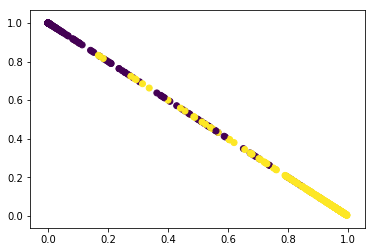

In [23]:
#予測確率の描画
import matplotlib.pyplot as plt
%matplotlib inline

mproba = model_lor.predict_proba(X)

plt.scatter(mproba[:, 0], mproba[:, 1], c = data.target)
plt.show()

In [25]:
#悪性(判定値=1)となるしきい値を10%に変更
import numpy as np
y_pred2 = (model_lor.predict_proba(X)[:, 1]>0.1).astype(np.int)
print(confusion_matrix(y, y_pred2))

[[259  98]
 [  2 210]]


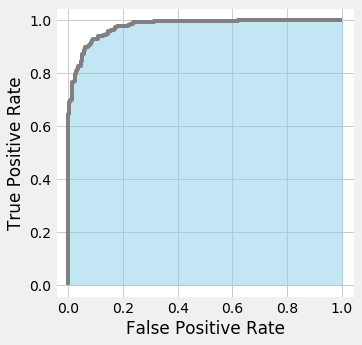

In [45]:
#ROC曲線の可視化
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5) #Figure が作成された後に Matplotlib の Figure サイズを変更

ax.step(fpr, tpr, "gray") #境界線のグレーのラインを描画
ax.fill_between(fpr, tpr, 0, color="skyblue", alpha=0.5) #指定した領域を塗りつぶし
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_facecolor("xkcd:white") #グラフ描画領域の背景色を指定
plt.show()

↑色付きの領域の面積がAUC(Area Under the Curve)を表し、  
AUCが1に近づくほど、精度が高いことを表す。  

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, probas[:, 1])

0.9767322023148882

In [57]:
tpr

array([0.        , 0.00471698, 0.64622642, 0.64622642, 0.68867925,
       0.68867925, 0.69811321, 0.69811321, 0.75943396, 0.75943396,
       0.76415094, 0.76415094, 0.76886792, 0.76886792, 0.79716981,
       0.79716981, 0.80660377, 0.80660377, 0.81603774, 0.81603774,
       0.8254717 , 0.8254717 , 0.84433962, 0.84433962, 0.8490566 ,
       0.8490566 , 0.87264151, 0.87264151, 0.88679245, 0.88679245,
       0.89622642, 0.89622642, 0.9009434 , 0.9009434 , 0.90566038,
       0.90566038, 0.91037736, 0.91037736, 0.91509434, 0.91509434,
       0.9245283 , 0.9245283 , 0.92924528, 0.92924528, 0.93396226,
       0.93396226, 0.93867925, 0.93867925, 0.94339623, 0.94339623,
       0.94811321, 0.94811321, 0.95754717, 0.95754717, 0.96226415,
       0.96226415, 0.96698113, 0.96698113, 0.97169811, 0.97169811,
       0.97641509, 0.97641509, 0.98113208, 0.98113208, 0.98584906,
       0.98584906, 0.99056604, 0.99056604, 0.99528302, 0.99528302,
       1.        , 1.        ])